<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-data" data-toc-modified-id="Import-Libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Selecting-Best-model" data-toc-modified-id="Selecting-Best-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Best model</a></span></li><li><span><a href="#Finalizing-and-Saving-Model" data-toc-modified-id="Finalizing-and-Saving-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finalizing and Saving Model</a></span></li></ul></div>

## Import Libraries and data

In [101]:
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [92]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## Exploratory Data Analysis

In [95]:
train.shape

(4250, 20)

In [97]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [96]:
# Check columns list and missing values
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [98]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [99]:
train.describe(include =['object'])

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [100]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


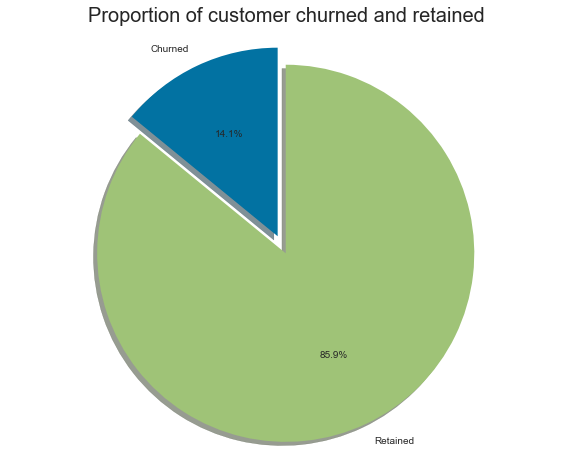

In [104]:
labels = 'Churned', 'Retained'
sizes = [train.churn[train['churn']=='yes'].count(), train.churn[train['churn']=='no'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

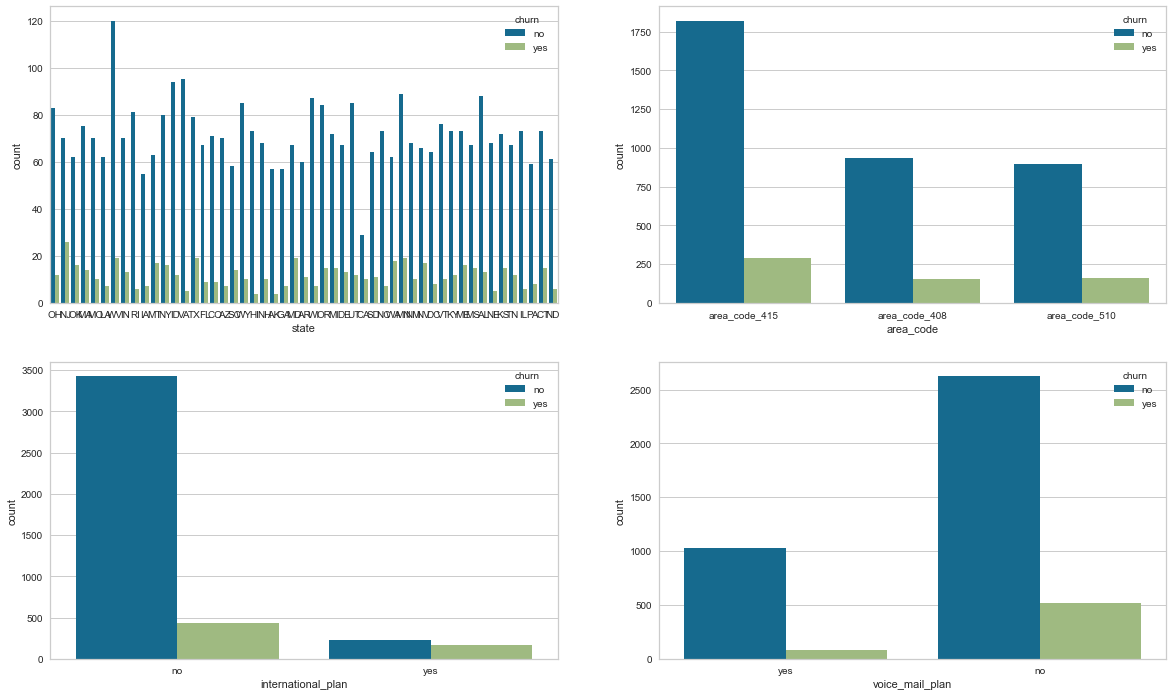

In [105]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='state', hue = 'churn',data = train, ax=axarr[0][0])
    sns.countplot(x='area_code', hue = 'churn',data = train, ax=axarr[0][1])
    sns.countplot(x='international_plan', hue = 'churn',data = train, ax=axarr[1][0])
    sns.countplot(x='voice_mail_plan', hue = 'churn',data = train, ax=axarr[1][1])

Add some comments !!!!!!

<AxesSubplot:xlabel='churn', ylabel='number_customer_service_calls'>

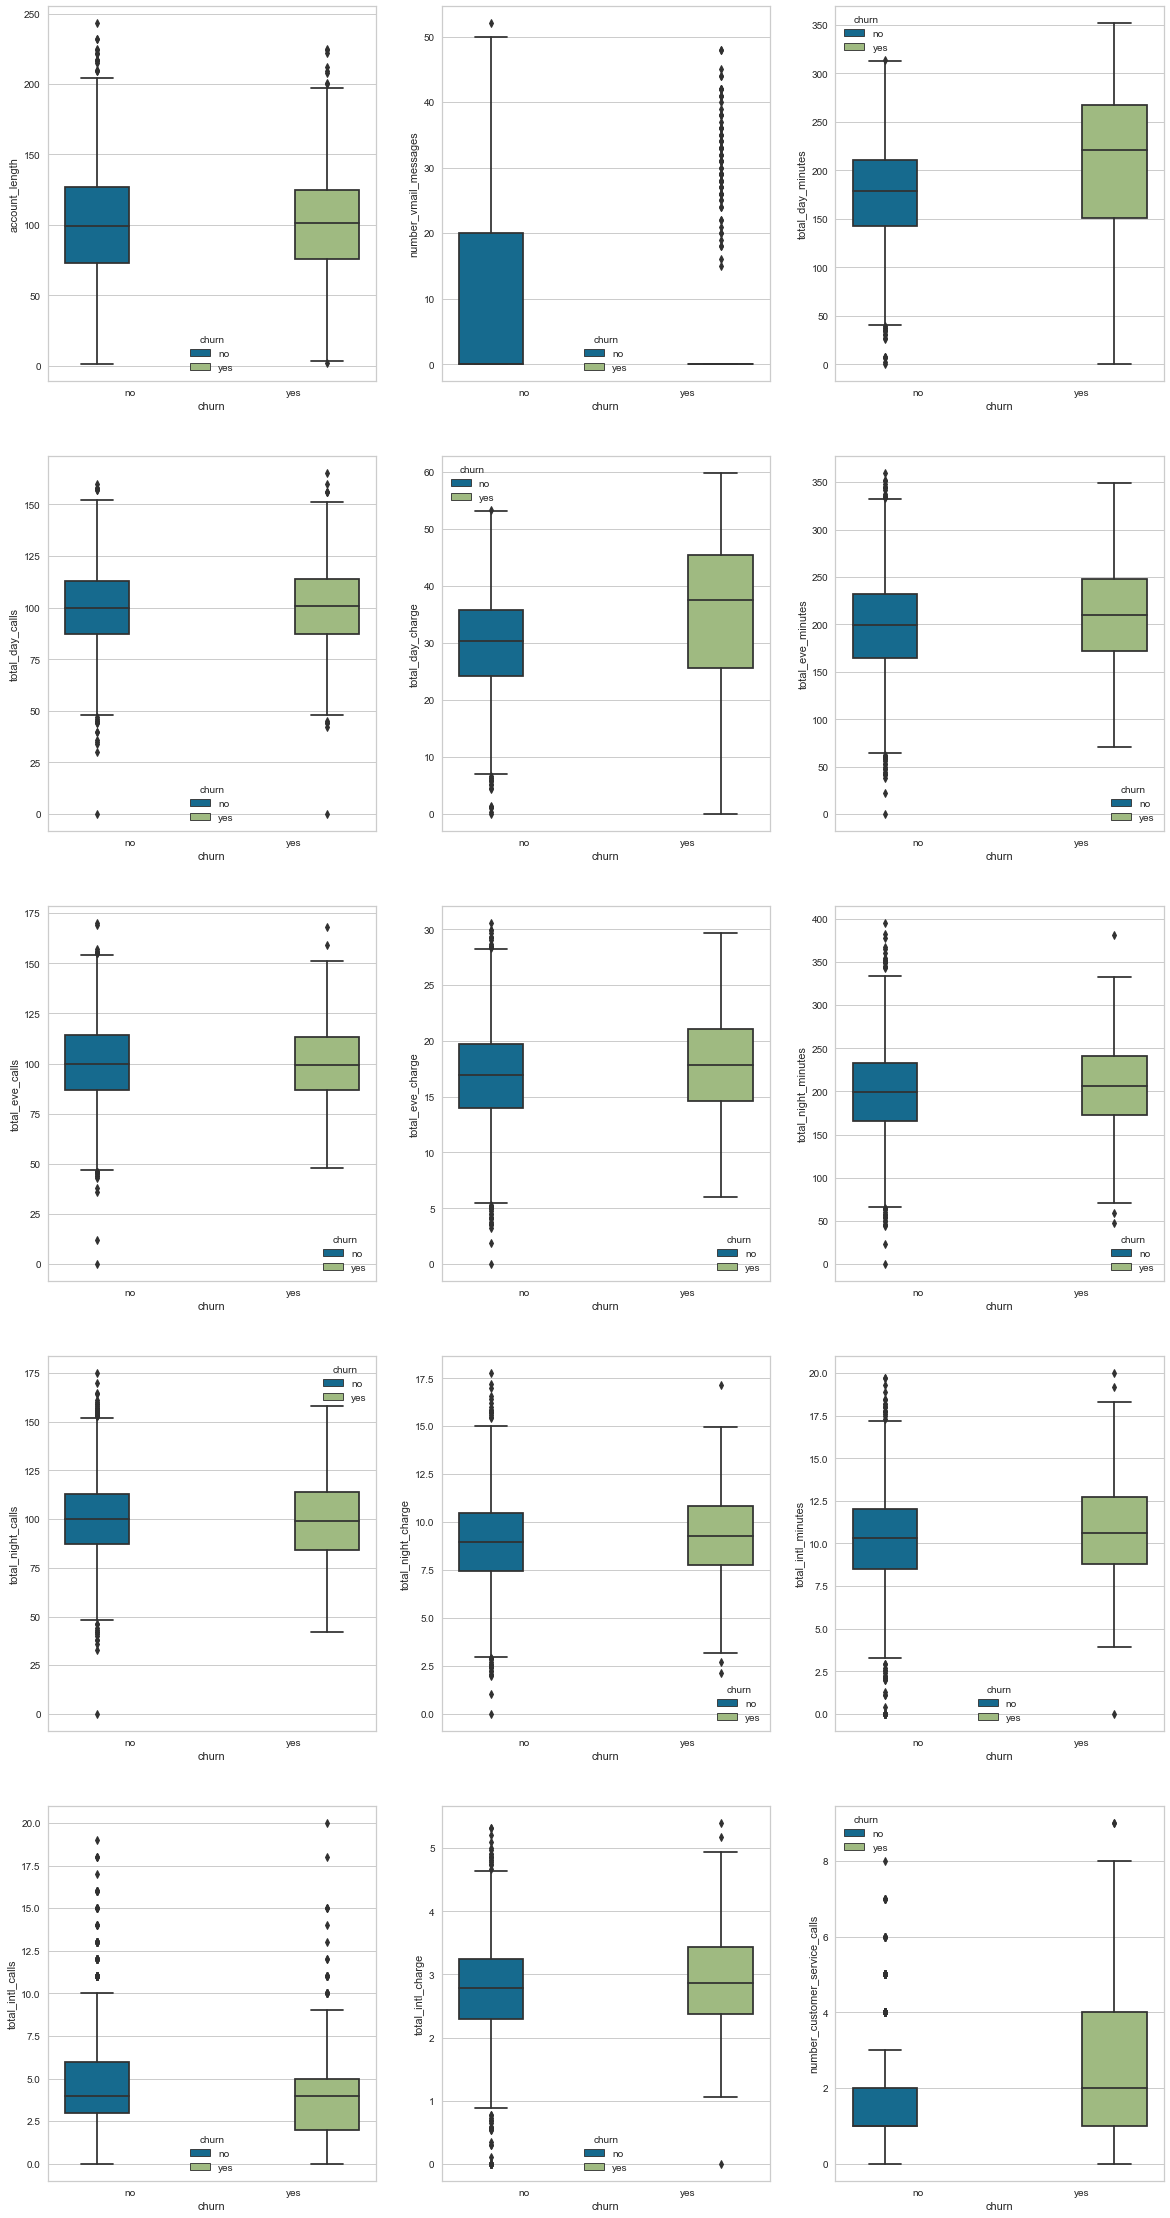

In [114]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(5, 3, figsize=(20, 40))
sns.boxplot(y='account_length',x = 'churn', hue = 'churn',data = train, ax=axarr[0][0])
sns.boxplot(y='number_vmail_messages',x = 'churn', hue = 'churn',data = train , ax=axarr[0][1])
sns.boxplot(y='total_day_minutes',x = 'churn', hue = 'churn',data = train, ax=axarr[0][2])
sns.boxplot(y='total_day_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[1][0])
sns.boxplot(y='total_day_charge',x = 'churn', hue = 'churn',data = train, ax=axarr[1][1])
sns.boxplot(y='total_eve_minutes',x = 'churn', hue = 'churn',data = train, ax=axarr[1][2])
sns.boxplot(y='total_eve_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[2][0])
sns.boxplot(y='total_eve_charge',x = 'churn', hue = 'churn',data = train, ax=axarr[2][1])
sns.boxplot(y='total_night_minutes',x = 'churn', hue = 'churn',data = train, ax=axarr[2][2])
sns.boxplot(y='total_night_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[3][0])
sns.boxplot(y='total_night_charge',x = 'churn', hue = 'churn',data = train, ax=axarr[3][1])
sns.boxplot(y='total_intl_minutes',x = 'churn', hue = 'churn',data = train, ax=axarr[3][2])
sns.boxplot(y='total_intl_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[4][0])
sns.boxplot(y='total_intl_charge',x = 'churn', hue = 'churn',data = train, ax=axarr[4][1])
sns.boxplot(y='number_customer_service_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[4][2])

Add some comments !!!!!!!!

## Model Training

In [37]:
from pycaret.classification import *
setting_up = setup(data = train, target = 'churn',
                   fix_imbalance = True,
                  numeric_imputation = "median",
                  categorical_imputation = "mode",
                   remove_outliers = True,
                   ignore_low_variance = True,
                   normalize = True,
                   train_size = 0.9,
                   log_experiment = True, 
                   experiment_name = 'churn_smote'
                  )

Setup Succesfully Completed!


,Description,Value
0,session_id,2251
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(4250, 20)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [38]:
setting_up[0].describe()

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,...,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,number_customer_service_calls_0,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_3,number_customer_service_calls_4,number_customer_service_calls_5
count,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,...,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000
mean,-0.005483,0.007100,0.003697,0.007099,0.000586,-0.002681,0.000584,0.001446,0.008258,0.001440,...,0.914788,0.085212,0.741144,0.258856,0.214020,0.370820,0.231112,0.135497,0.046074,0.002477
std,0.999545,0.991381,0.991002,0.991381,0.994828,0.992585,0.994831,0.991088,0.995801,0.991086,...,0.279231,0.279231,0.438060,0.438060,0.410192,0.483084,0.421596,0.342296,0.209671,0.049715
min,-2.500048,-3.289626,-3.522047,-3.289906,-3.540230,-4.429587,-3.539227,-3.114901,-3.326863,-3.113400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.686160,-0.676954,-0.650291,-0.676906,-0.676184,-0.661926,-0.675535,-0.655997,-0.688847,-0.654950,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.031144,0.010006,0.004671,0.010382,0.012461,-0.008865,0.012876,0.005405,0.007987,0.007110,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.674257,0.671044,0.659633,0.671529,0.667271,0.644196,0.666163,0.670779,0.655048,0.669170,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.596633,3.170765,3.027572,3.171252,3.023790,3.507619,3.024085,3.862588,3.741029,3.860300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
models = compare_models(n_select = 3,fold =5, round =2, exclude = [ 'qda', 'gpc'] , turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.96,0.91,0.75,0.88,0.81,0.78,0.79,0.49
1,Light Gradient Boosting Machine,0.96,0.91,0.76,0.89,0.82,0.79,0.80,0.29
2,CatBoost Classifier,0.96,0.91,0.77,0.88,0.82,0.80,0.80,7.52
3,Extra Trees Classifier,0.94,0.91,0.60,0.83,0.69,0.66,0.67,0.24
4,Random Forest Classifier,0.93,0.89,0.59,0.76,0.67,0.63,0.63,0.11
5,Gradient Boosting Classifier,0.93,0.90,0.72,0.73,0.73,0.69,0.69,1.94
6,Decision Tree Classifier,0.92,0.84,0.74,0.63,0.68,0.64,0.64,0.09
7,MLP Classifier,0.92,0.88,0.64,0.70,0.67,0.62,0.62,5.51
8,Ada Boost Classifier,0.88,0.85,0.58,0.52,0.55,0.48,0.48,0.54
9,SVM - Radial Kernel,0.87,0.88,0.81,0.49,0.61,0.54,0.57,6.99


In [40]:
models

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', random_state=2251, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=0),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2251, reg_alpha=0.0, reg

In [41]:
model = [tune_model(i,fold =5, round =2, optimize = 'F1' ) for i in models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.96,0.94,0.81,0.87,0.84,0.82,0.82
1,0.95,0.92,0.75,0.83,0.79,0.76,0.76
2,0.95,0.89,0.80,0.78,0.79,0.76,0.76
3,0.94,0.91,0.78,0.77,0.78,0.74,0.74
4,0.95,0.90,0.75,0.80,0.77,0.74,0.74
Mean,0.95,0.91,0.78,0.81,0.79,0.76,0.76
SD,0.01,0.02,0.02,0.04,0.02,0.03,0.03


In [48]:
model

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.03, max_delta_step=0, max_depth=110,
               min_child_weight=3, missing=nan, monotone_constraints='()',
               n_estimators=400, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', random_state=2251, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=0.7,
               tree_method='exact', validate_parameters=1, verbosity=0),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=30,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.6,
                n_estimators=30, n_jobs=-1, num_leaves=80, objective=None,
                random_state=2251, reg_alpha=0.5, reg_l

In [49]:
mlp = create_model('mlp')
ensemble = stack_models(model,fold =5, round =2, meta_model = mlp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.96,0.94,0.79,0.84,0.81,0.79,0.79
1,0.95,0.90,0.75,0.85,0.80,0.77,0.77
2,0.95,0.89,0.78,0.78,0.78,0.75,0.75
3,0.95,0.93,0.75,0.85,0.80,0.77,0.77
4,0.95,0.88,0.74,0.84,0.79,0.76,0.76
Mean,0.95,0.91,0.76,0.83,0.79,0.77,0.77
SD,0.00,0.02,0.02,0.02,0.01,0.01,0.01


## Selecting Best model

In [55]:
best = automl(optimize = 'F1')

In [56]:
best

###### Optimizing threshold

In [57]:
optimize_threshold(best, true_negative = 1500, false_negative = -5000)

Optimized Probability Threshold: 0.25 | Optimized Cost Function: 516000


In [58]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9827,0.9979,0.8571,1.0,0.9231,0.9134,0.9168


In [59]:
pred_holdout = predict_model(best,probability_threshold=0.25)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9901,0.9979,0.9388,0.9787,0.9583,0.9527,0.953


###### interpret model

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x0000018F879FEAC8>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


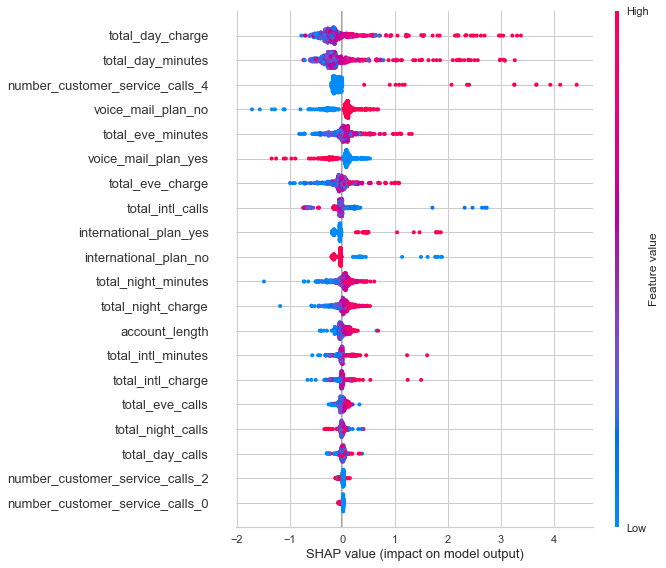

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [68]:
interpret_model(final)

## Finalizing and Saving Model

In [61]:
final = finalize_model(best)
unseen_predictions = predict_model(final,probability_threshold=0.25 ,data=test)
unseen_predictions.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Label,Score
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,no,0.0355
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,no,0.0558
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,26.11,203.0,99,9.14,13.1,6,3.54,4,yes,0.8778
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,18.55,129.6,121,5.83,8.1,3,2.19,3,no,0.0241
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,23.55,250.7,115,11.28,15.5,5,4.19,3,no,0.0407


In [75]:
save_model(final,'model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=<catboost.core.CatBoostClassifier object at 0x0000018F879FEAC8>, model_name=model, model_only=False, verbose=True)
INFO:logs:Adding model into prep_pipe
INFO:logs:model.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                numeric_strategy='median',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Lev...
                 Outlier(contamination=0.0

Transformation Pipeline and Model Succesfully Saved
